In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from copy import deepcopy

from neuron import h
from neuron import gui

_ = h.load_file("stdlib.hoc")
_ = h.load_file("import3d.hoc")

--No graphics will be displayed.


In [12]:
nseg_per_branch = 16

r_a = 5_000  # ohm cm 
i_delay = 3.0  # ms
i_amp = 0.2  # nA
i_dur = 2.0  # ms
dt = 0.025  # ms
t_max = 50.0  # ms

In [13]:
time_vec = np.arange(0.0, t_max+dt, dt)

In [14]:
for sec in h.allsec():
    h.delete_section(sec=sec)

cell = h.Import3d_SWC_read()
cell.input("morph.swc")
i3d = h.Import3d_GUI(cell, False)
i3d.instantiate(None)

0.0

In [15]:
stim = h.IClamp(h.soma[0](0.0))
stim.delay = i_delay
stim.dur = i_dur
stim.amp = i_amp

voltage_recs = {}

voltage_soma = h.Vector()
voltage_soma.record(h.soma[0](0.0)._ref_v)
voltage_recs["v0"] = voltage_soma

for p in range(len(h.apic)):
    v = h.Vector()
    v.record(h.apic[p](1.0)._ref_v)
    voltage_recs[f"v{p+1}"] = v

In [16]:
num_branches = 0
for sec in h.allsec():
    sec.insert("hh")
    sec.Ra = r_a
    
    sec.gnabar_hh = 0.120  # S/cm2
    sec.gkbar_hh = 0.036  # S/cm2
    sec.gl_hh = 0.0003  # S/cm2
    sec.ena = 50  # mV
    sec.ek = -77.0  # mV
    sec.el_hh = -54.3  # mV
        
    sec.nseg = nseg_per_branch
    num_branches += 1
print("num_branches", num_branches)

num_branches 156


In [17]:
time_vec = np.arange(0.0, t_max+2*dt, dt)
h.dt = dt
tstop = t_max
v_init = -62.0
def initialize():
    h.finitialize(v_init)
    h.fcurrent()
    
def integrate():
    while h.t < tstop:
        h.fadvance()

In [18]:
start_time = time.time()
initialize()
integrate()
print("Time", time.time() - start_time)

Time 0.6645193099975586


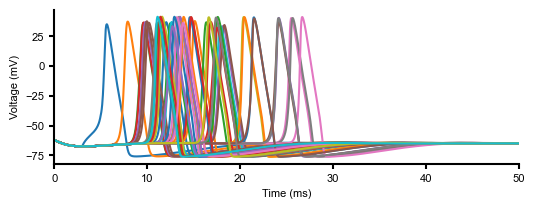

In [19]:
with mpl.rc_context(fname=".matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    for p, _ in enumerate(range(50)):
        _ = ax.plot(time_vec[:-1], list(voltage_recs[f"v{p}"]))

    ax.set_xticks(np.arange(0, max(time_vec)+1, 10))
    ax.set_xlim([0, max(time_vec)])
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Voltage (mV)")
    plt.subplots_adjust(hspace=0.4)
    plt.show()